In [2]:
from google.colab import files
import pandas as pd

# Upload CSV files
uploaded = files.upload()

# Load the datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Display the first few rows of each dataset
print(customers.head())
print(transactions.head())

Saving Customers.csv to Customers.csv
Saving Transactions.csv to Transactions.csv
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067   2024-04-25 7:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.

In [3]:
# Merge datasets
merged_df = transactions.merge(customers, on='CustomerID')

# Display the first few rows of the merged dataset
print(merged_df.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067   2024-04-25 7:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price     CustomerName         Region  SignupDate  
0      300.68  300.68   Andrea Jenkins         Europe  2022-12-03  
1      300.68  300.68  Brittany Harvey           Asia  2024-09-04  
2      300.68  300.68  Kathryn Stevens         Europe  2024-04-04  
3      601.36  300.68  Travis Campbell  South America  2024-04-11  
4      902.04  300.68    Timothy Perez         Europe  2022-03-15  


In [4]:
# Aggregate transaction data for each customer
customer_summary = merged_df.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum',
    'Price': 'mean',  # Average price of products purchased
    'ProductID': 'nunique'  # Number of unique products purchased
}).reset_index()

# Merge with customer data
customer_features = customers.merge(customer_summary, on='CustomerID')

# Display the first few rows of the customer features dataset
print(customer_features.head())

  CustomerID        CustomerName         Region  SignupDate  Quantity  \
0      C0001    Lawrence Carroll  South America  2022-07-10        12   
1      C0002      Elizabeth Lutz           Asia  2022-02-13        10   
2      C0003      Michael Rivera  South America  2024-03-07        14   
3      C0004  Kathleen Rodriguez  South America  2022-10-09        23   
4      C0005         Laura Weber           Asia  2022-08-15         7   

   TotalValue       Price  ProductID  
0     3354.52  278.334000          5  
1     1862.74  208.920000          4  
2     2725.38  195.707500          4  
3     5354.88  240.636250          8  
4     2034.24  291.603333          3  


In [5]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = ['Quantity', 'TotalValue', 'Price', 'ProductID']

# Normalize the numerical features
scaler = StandardScaler()
customer_features[features] = scaler.fit_transform(customer_features[features])

# Display the first few rows of the normalized customer features dataset
print(customer_features.head())

  CustomerID        CustomerName         Region  SignupDate  Quantity  \
0      C0001    Lawrence Carroll  South America  2022-07-10 -0.122033   
1      C0002      Elizabeth Lutz           Asia  2022-02-13 -0.448000   
2      C0003      Michael Rivera  South America  2024-03-07  0.203934   
3      C0004  Kathleen Rodriguez  South America  2022-10-09  1.670787   
4      C0005         Laura Weber           Asia  2022-08-15 -0.936951   

   TotalValue     Price  ProductID  
0   -0.061701  0.094670   0.050047  
1   -0.877744 -0.904016  -0.424204  
2   -0.405857 -1.094109  -0.424204  
3    1.032547 -0.447702   1.472798  
4   -0.783929  0.285581  -0.898455  


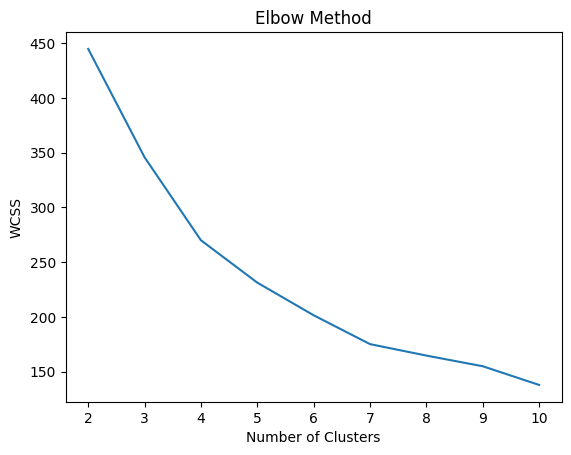

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(customer_features[features])
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
# Apply K-Means clustering with the chosen number of clusters
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
customer_features['Cluster'] = kmeans.fit_predict(customer_features[features])

# Display the first few rows of the customer features dataset with clusters
print(customer_features.head())

  CustomerID        CustomerName         Region  SignupDate  Quantity  \
0      C0001    Lawrence Carroll  South America  2022-07-10 -0.122033   
1      C0002      Elizabeth Lutz           Asia  2022-02-13 -0.448000   
2      C0003      Michael Rivera  South America  2024-03-07  0.203934   
3      C0004  Kathleen Rodriguez  South America  2022-10-09  1.670787   
4      C0005         Laura Weber           Asia  2022-08-15 -0.936951   

   TotalValue     Price  ProductID  Cluster  
0   -0.061701  0.094670   0.050047        3  
1   -0.877744 -0.904016  -0.424204        0  
2   -0.405857 -1.094109  -0.424204        3  
3    1.032547 -0.447702   1.472798        2  
4   -0.783929  0.285581  -0.898455        0  


In [12]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(customer_features[features], customer_features['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

# Calculate Silhouette Score
sil_score = silhouette_score(customer_features[features], customer_features['Cluster'])
print(f'Silhouette Score: {sil_score}')

Davies-Bouldin Index: 1.011942282538582
Silhouette Score: 0.2908762463864909


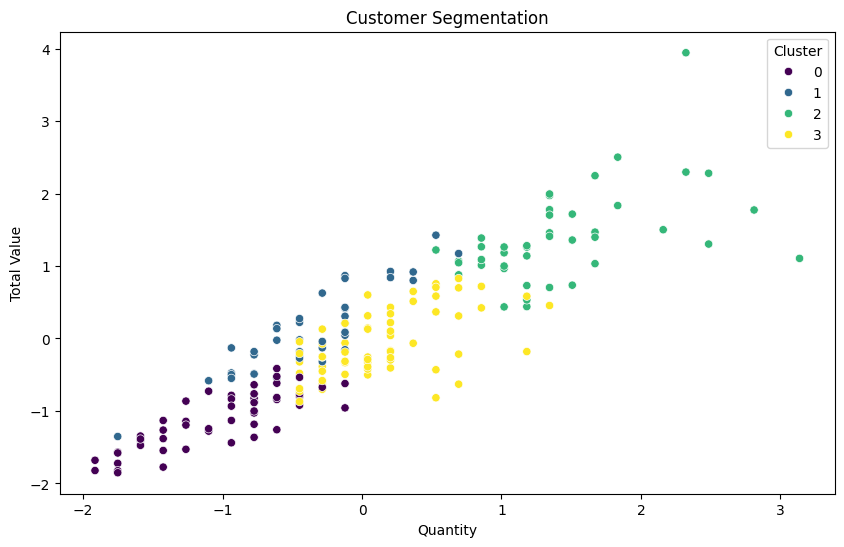

In [11]:
import seaborn as sns

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_features, x='Quantity', y='TotalValue', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Quantity')
plt.ylabel('Total Value')
plt.legend(title='Cluster')
plt.show()